Ver si existe relacion entre nivel de satisfaccion  en el trabajo y la rotacion de los empleados y ver la magnitud de la relacion  

H0 "Existe una relación entre el nivel de satisfacción en el trabajo y la rotación de empleados en la empresa. Se sospecha que los empleados con niveles de satisfacción más bajos tienen una mayor probabilidad de dejar la empresa".  

Para ello deberéis crear una columna nueva en base al nivel de satisfacción en el trabajo para crear dos grupos, las condiciones para crear los grupos son:

    - Grupo A (Control): Empleados con un nivel de satisfacción en el trabajo igual o superior a 3 en una escala de 1 a 5

    - Grupo B (Variante): Empleados con un nivel de satisfacción en el trabajo inferior a 3 en la misma escala.  
    
La métrica principal que debes usar es la tasa de rotación de empleados (Attrition) en cada grupo. Recordemos que, en esta columna, "No" indica que el empleado no ha dejado la empresa (sin rotación), mientras que "Yes" indica que el empleado ha dejado la empresa (con rotación).


- Analiza los resultados.

- Calcula la magnitud de esta relación utilizando estadísticas como la diferencia de medias por ejemplo.  




In [37]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Realizar los distintos test
# ------------------------------------------------------------------------------

from scipy.stats import ttest_ind, norm, chi2_contingency, f_oneway
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from scipy import stats
from scipy.stats import levene
from scipy.stats import shapiro, poisson, chisquare, expon, kstest
from statsmodels.stats import proportion 
import statsmodels.stats.proportion as smprop 
from statsmodels.stats.proportion import proportions_ztest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore") 

In [3]:
df = pd.read_csv("Files/df_fase1.csv", index_col=0)
df.head(2)

,IdEmployee,EmployeeNumber,Age,DateBirth,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,RemoteWork
0,0,"162,0",52,1972,No,no-data,684.0,6,3,no-data,1,Male,51.0,3,5,Research Director,3,no-data,6462.0,7,No,13,3,3,0,no-data,5,3,20,15,15,True
1,1,"259,0",53,1971,No,no-data,699.0,1,4,Life Sciences,1,Male,65.0,2,5,Manager,3,no-data,5678.0,0,no-data,14,3,1,1,"34,0",5,3,33,11,9,True


- Divide a los empleados en los grupos A y B según los criterios establecidos.

In [4]:
# División del grupo A, empleados con un nivel de satisfacción igual o superior a 3.
# Vamos a imputar una columna, que nos indique, por fila, a qué grupo pertenece según su JobSatisfaction.

df['GroupSatisfaction'] = df['JobSatisfaction'].apply(lambda x: 'A' if x >= 3 else 'B')

In [5]:


# Paso 1: Agrupamos los datos por "GroupSatisfaction" y "Attrition"
conteo_grupos = df.groupby(['GroupSatisfaction', 'Attrition']).size().unstack()

# Paso 2: Calcular la tasa de rotación para cada grupo
# "Yes" es el número de personas que se han ido y "No" el número que se ha quedado
rotacion = (conteo_grupos['Yes'] / (conteo_grupos['Yes'] + conteo_grupos['No'])) * 100

# Mostrar los resultados
print("Tasa de rotación por grupo:")
print(rotacion)


Tasa de rotación por grupo:
GroupSatisfaction
A    13.849509
B    19.520548
dtype: float64


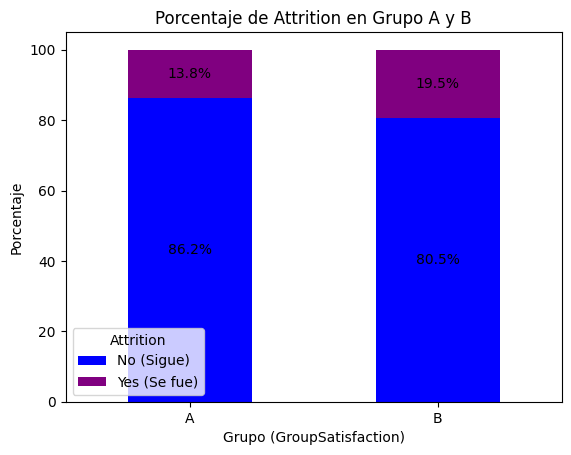

In [6]:
# Paso 1: Agrupamos los datos por "GroupSatisfaction" y "Attrition"
conteo_grupos = df.groupby(['GroupSatisfaction', 'Attrition']).size().unstack()

# Paso 2: Calculamos los porcentajes para cada grupo
porcentajes = conteo_grupos.apply(lambda x: x / x.sum() * 100, axis=1)

# Paso 3: Crear el gráfico de barras
ax = porcentajes.plot(kind='bar', stacked=True, color=['blue', 'purple'])

# Añadir títulos y etiquetas
plt.title('Porcentaje de Attrition en Grupo A y B')
plt.ylabel('Porcentaje')
plt.xlabel('Grupo (GroupSatisfaction)')
plt.legend(title='Attrition', labels=['No (Sigue)', 'Yes (Se fue)'])
plt.xticks(rotation=0)

# Añadir los porcentajes sobre las barras
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2

    # Mostrar el porcentaje en cada barra
    if height > 0:
        ax.annotate(f'{height:.1f}%', (x, y), ha='center', va='center')

# Mostrar el gráfico
plt.show()


In [7]:
df.sample(3)

,IdEmployee,EmployeeNumber,Age,DateBirth,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,RemoteWork,GroupSatisfaction
1369,1265,no-data,42,1982,Yes,travel_rarely,895.0,20,2,Marketing,1,Female,70.0,3,1,Sales Representative,2,no-data,21728.0,1,Yes,22,4,4,0,"4,0",5,2,4,0,2,True,B
11,11,"1712,0",46,1978,No,non-travel,1238.0,1,1,no-data,1,Male,74.0,2,3,Healthcare Representative,3,no-data,3395.0,3,no-data,23,4,4,1,"25,0",3,2,23,14,4,False,A
1486,1382,no-data,39,1985,No,travel_rarely,1206.0,9,2,no-data,1,Male,71.0,3,1,Research Scientist,4,Divorced,14293.0,2,No,19,3,4,2,no-data,0,4,5,0,3,False,A


In [8]:
groupB = df[df['GroupSatisfaction'] == 'B']
groupB.sample(2)

,IdEmployee,EmployeeNumber,Age,DateBirth,Attrition,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,RemoteWork,GroupSatisfaction
1458,1354,no-data,32,1992,No,no-data,182.0,8,5,Life Sciences,1,Female,93.0,3,4,Research Director,2,no-data,8847.0,3,No,11,3,3,0,no-data,3,4,3,1,0,True,B
1029,1029,"1494,0",25,1999,Yes,travel_frequently,381.0,9,3,no-data,1,Male,89.0,3,1,Laboratory Technician,1,no-data,16998.0,2,no-data,11,3,3,0,no-data,2,2,0,0,0,False,B


In [36]:
from statsmodels.stats.proportion import proportions_ztest

# Definir las tasas de rotación y el tamaño de cada grupo
rotacion_A_yes = conteo_grupos.loc['A', 'Yes']
total_A = conteo_grupos.loc['A', 'Yes'] + conteo_grupos.loc['A', 'No']

rotacion_B_yes = conteo_grupos.loc['B', 'Yes']
total_B = conteo_grupos.loc['B', 'Yes'] + conteo_grupos.loc['B', 'No']

# Realizamos la prueba de proporciones
count = [rotacion_A_yes, rotacion_B_yes]  # número de éxitos (Yes)
nobs = [total_A, total_B]  # número total de observaciones

stat, p_value = proportions_ztest(count, nobs)

# Mostrar los resultados
print(f"Z-statistic: {stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Hay una diferencia significativa en la tasa de rotación entre los grupos A y B.")
else:
    print("No hay una diferencia significativa en la tasa de rotación entre los grupos A y B.")


Z-statistic: -2.9177646129623818, P-value: 0.0035255037522189513
Hay una diferencia significativa en la tasa de rotación entre los grupos A y B.


In [43]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

# Supongamos que tu DataFrame es df

# Paso 1: Agrupamos los datos por "GroupSatisfaction" y "Attrition"
conteo_grupos = df.groupby(['GroupSatisfaction', 'Attrition']).size().unstack()

# Paso 2: Calcular la tasa de rotación para cada grupo
rotacion_A_yes = conteo_grupos.loc['A', 'Yes']
total_A = conteo_grupos.loc['A', 'Yes'] + conteo_grupos.loc['A', 'No']

rotacion_B_yes = conteo_grupos.loc['B', 'Yes']
total_B = conteo_grupos.loc['B', 'Yes'] + conteo_grupos.loc['B', 'No']

# Paso 3: Calcular las tasas de rotación
tasa_rotacion_A = rotacion_A_yes / total_A
tasa_rotacion_B = rotacion_B_yes / total_B

# Paso 4: Realizar la prueba de proporciones (z-test)
count = [rotacion_A_yes, rotacion_B_yes]  # número de "Yes"
nobs = [total_A, total_B]  # total de observaciones

stat, p_value = proportions_ztest(count, nobs)

# Paso 5: Calcular el intervalo de confianza para cada proporción
ci_A = proportion_confint(rotacion_A_yes, total_A, alpha=0.05, method='normal')
ci_B = proportion_confint(rotacion_B_yes, total_B, alpha=0.05, method='normal')

# Paso 6: Diferencia de tasas de rotación
diferencia_medias = tasa_rotacion_A - tasa_rotacion_B

# Mostrar los resultados
print(f"Tasa de rotación Grupo A: {tasa_rotacion_A * 100:.2f}%")
print(f"Tasa de rotación Grupo B: {tasa_rotacion_B * 100:.2f}%")
print(f"Diferencia de medias (A - B): {diferencia_medias * 100:.2f}%")
print(f"Intervalo de confianza para el Grupo A: ({ci_A[0] * 100:.2f}%, {ci_A[1] * 100:.2f}%)")
print(f"Intervalo de confianza para el Grupo B: ({ci_B[0] * 100:.2f}%, {ci_B[1] * 100:.2f}%)")
print(f"Estadístico Z: {stat}, P-value: {p_value}")


Tasa de rotación Grupo A: 13.85%
Tasa de rotación Grupo B: 19.52%
Diferencia de medias (A - B): -5.67%
Intervalo de confianza para el Grupo A: (11.61%, 16.09%)
Intervalo de confianza para el Grupo B: (16.31%, 22.74%)
Estadístico Z: -2.9177646129623818, P-value: 0.0035255037522189513
